In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Частина перша: Знайомство з Pandas

Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" посилання

In [18]:
table_fers_rate = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8", match="Коефіцієнт народжуваності в регіонах")

df = table_fers_rate[0]

print(df)


               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126    —    —
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82    —
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51    —
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

Вивести перші рядки таблиці за допомогою методу head

In [19]:
print(df.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [20]:
rows, columns = df.shape

print(f"Rows is {rows}, columns is {columns}.")

Rows is 28, columns is 9.


Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [21]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

Замініть у таблиці значення "—" на значення NaN.

Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—".

In [22]:
# Перетворення колонок "2014" та "2019" з нечислових колонок на числові
df["2014"] = pd.to_numeric(df["2014"], errors='coerce')
df["2019"] = pd.to_numeric(df["2019"], errors='coerce')

print(df[["2014", "2019"]].head())
print(df.dtypes)

    2014   2019
0    NaN    NaN
1  109.0   76.0
2  141.0  101.0
3  111.0   71.0
4   82.0    NaN
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [23]:
df_count_isna = df.isna().sum()

print(df_count_isna)

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64


Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [24]:
df = df.drop(df.index[-1])

print(df)

               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська  23

Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [25]:
df = df.fillna(
    {"1950": df["1950"].mean(), 
     "1960": df["1960"].mean(), 
     "1970": df["1970"].mean(), 
     "2014": df["2014"].mean(), 
     "2019": df["2019"].mean()})



In [26]:
print(df)

               Регіон    1950        1960   1970  1990  2000  2012    2014  \
0                Крим  230.00  206.000000  160.0   130    73   126  111.44   
1           Вінницька  224.00  192.000000  142.0   124    84   112  109.00   
2           Волинська  247.00  250.000000  179.0   153   112   148  141.00   
3    Дніпропетровська  204.00  204.000000  151.0   123    71   112  111.00   
4            Донецька  271.00  214.000000  140.0   109    61    98   82.00   
5         Житомирська  261.00  223.000000  159.0   129    89   122  120.00   
6        Закарпатська  314.00  273.000000  207.0   168   115   151  146.00   
7          Запорізька  219.00  197.000000  150.0   124    71   106  106.00   
8   Івано-Франківська  243.00  248.000000  182.0   155   103   124  122.00   
9            Київська  204.00  189.000000  156.0   123    73   122  121.00   
10     Кіровоградська  216.00  171.000000  145.0   126    79   110  108.00   
11          Луганська  262.00  235.000000  144.0   116    62    

Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [27]:
average_birth_rate_2019 = df['2019'].mean()

regions_above_average = df[df['2019'] > average_birth_rate_2019]['Регіон']

print(regions_above_average)

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


У якому регіоні була найвища народжуваність у 2014 році?

In [28]:
region_max_2014 = df.loc[df['2014'].idxmax(), 'Регіон']

print(region_max_2014)

Рівненська



Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

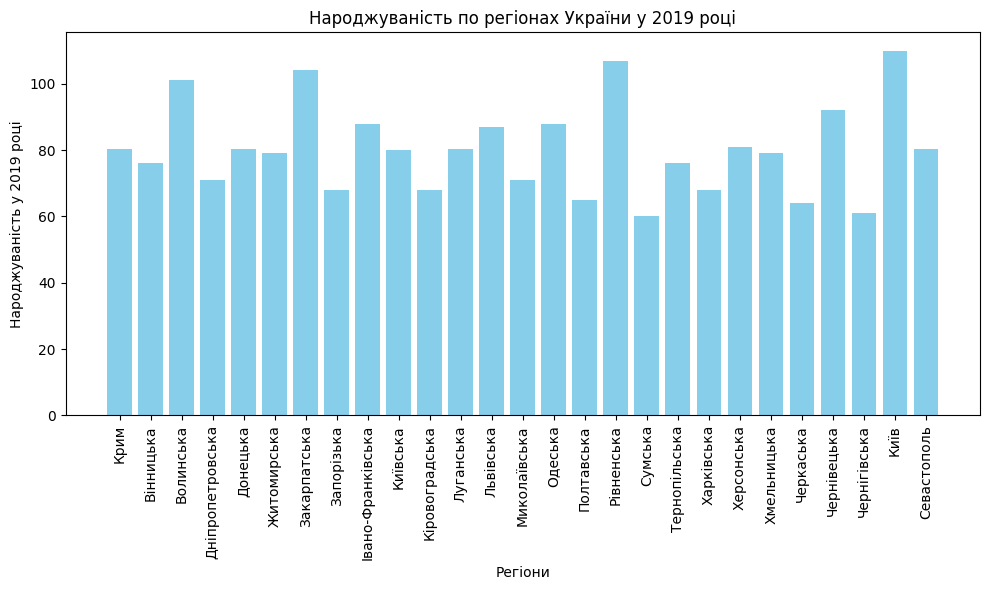

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(df['Регіон'], df['2019'], color='skyblue')
plt.xlabel('Регіони')
plt.ylabel('Народжуваність у 2019 році')
plt.title('Народжуваність по регіонах України у 2019 році')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()